In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline
sns.set_style("dark")

### Loading data from file and give columns appropriate names.

In [2]:
data = r"einkommen.train"
columns = ["Age", "Employment", "Factor", "Education", "School_period", "Marital", "Occupation",
           "Partnership", "Ethnicity", "Gender", "Gains", "Losses", "Hours", "Country", "Income"
          ]
df = pd.read_csv(data, names=columns, skipinitialspace=True)

df

,Age,Employment,Factor,Education,School_period,Marital,Occupation,Partnership,Ethnicity,Gender,Gains,Losses,Hours,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,30,Private,55481,Masters,14,Never-married,Tech-support,Unmarried,White,Male,0,0,45,Nicaragua,?
29996,48,Private,119471,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,56,Philippines,?
29997,61,Local-gov,167347,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,United-States,?
29998,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,?


# Exploratory Data Analysis
#### Descriptive statistics for numeric columns


In [3]:
df.describe()

,Age,Factor,School_period,Gains,Losses,Hours
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,38.582467,1.897675e+05,10.079733,1091.686667,86.621200,40.431933
std,13.647747,1.054420e+05,2.572236,7467.388819,401.529212,12.313094
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784780e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369385e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Checking for null values
There is no null values in the dataset. But missing values in this data are marked as "?" so we have to deal with it later.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            30000 non-null  int64 
 1   Employment     30000 non-null  object
 2   Factor         30000 non-null  int64 
 3   Education      30000 non-null  object
 4   School_period  30000 non-null  int64 
 5   Marital        30000 non-null  object
 6   Occupation     30000 non-null  object
 7   Partnership    30000 non-null  object
 8   Ethnicity      30000 non-null  object
 9   Gender         30000 non-null  object
 10  Gains          30000 non-null  int64 
 11  Losses         30000 non-null  int64 
 12  Hours          30000 non-null  int64 
 13  Country        30000 non-null  object
 14  Income         30000 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


Selecting numeric and categorical columns

In [5]:
numeric_col = df.select_dtypes(include=np.number).columns.tolist()
categorical_col = df.select_dtypes("object").columns.tolist()

#### Plot the distribution of numeric columns
Most of the values in the columns `Gains` and `Losses` are zeros. So these columns will not be used for training as they are unlikely to contain useful information.

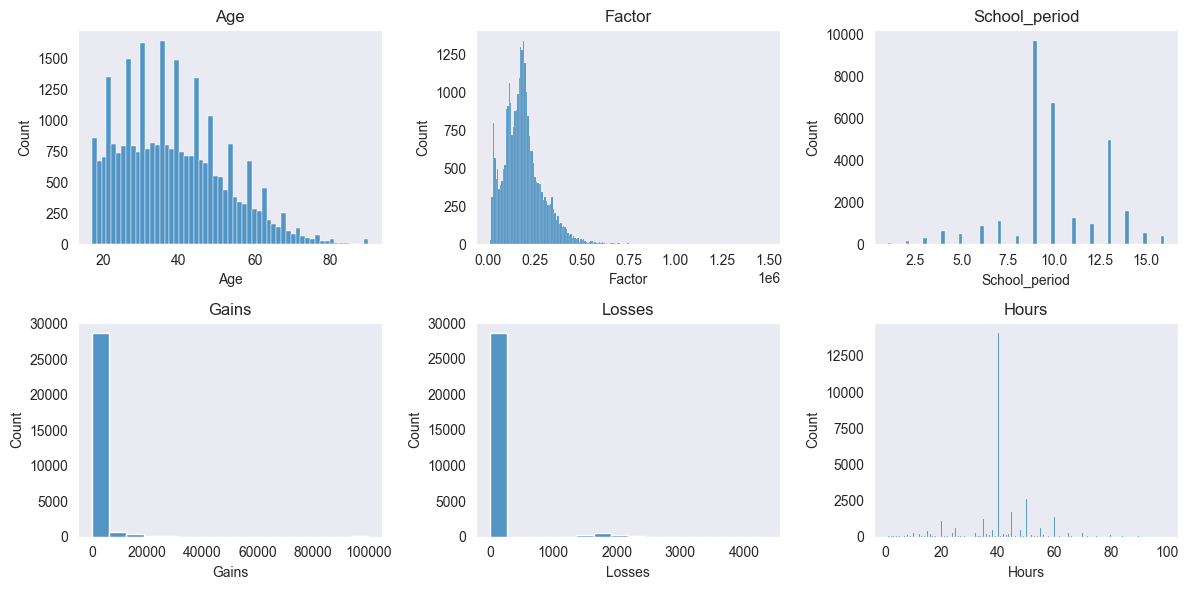

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(12,6))
for index, col in enumerate(numeric_col):
    sns.histplot(df[col], ax=axes.flat[index])
#     df[col].hist(ax=axes.flat[index])
    axes.flat[index].set_title(col)
plt.tight_layout()
plt.show()

#### Plot the distribution of categorical columns
Some of the categorical columns have missing values (marked as `?`). We will take a closer look at them right after.

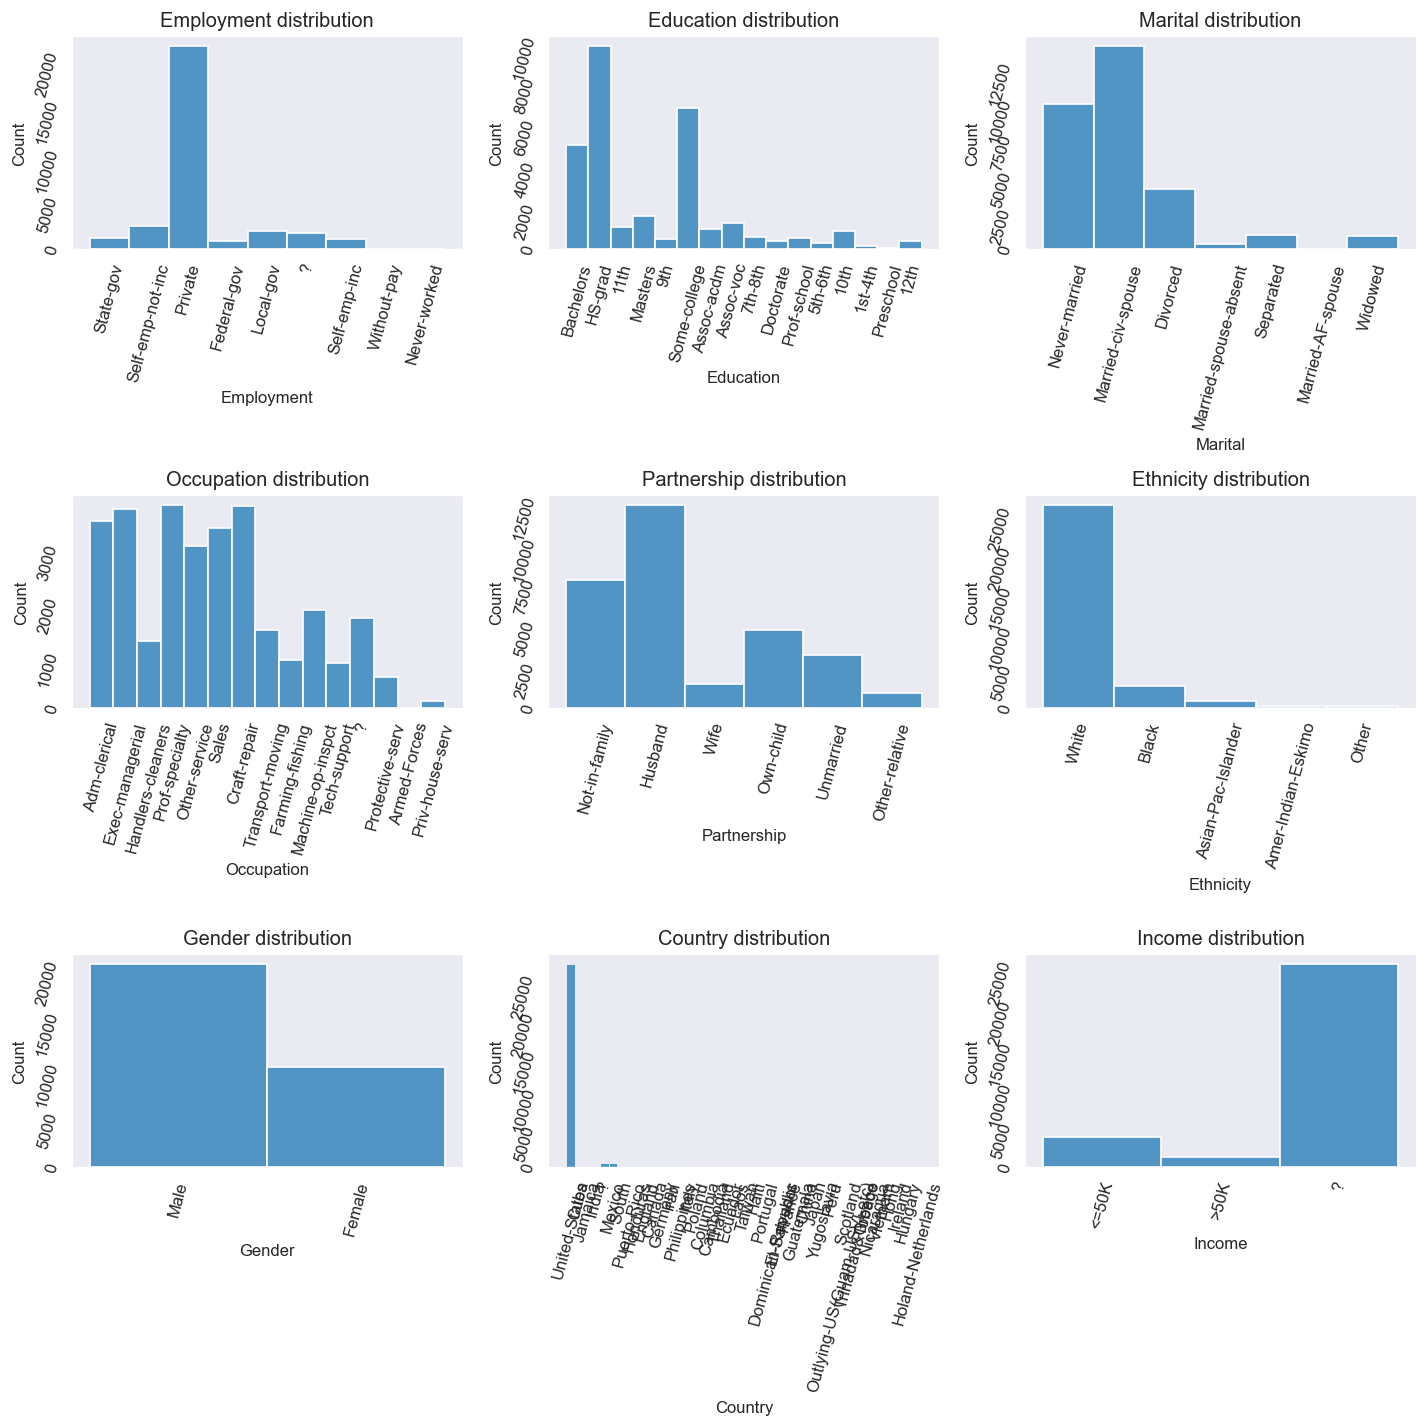

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(12,12), dpi=120)
for index, col in enumerate(categorical_col):
    sns.histplot(df[col], ax=axes.flat[index])
#     df[col].hist(ax=axes.flat[index])
    axes.flat[index].set_title(col + " distribution")
    axes.flat[index].tick_params(labelrotation=75)
plt.tight_layout()
plt.show()

#### Handle missing values
Check all categorical columns for missing values

In [8]:
for col in categorical_col:
#     value = df[col][df[col].str.contains("\?")].value_counts().sum()
    value = df[col][df[col] == ("?")].value_counts().sum()
    if value > 0:
        print(f"{col} has {value} missing values or {value/len(df)*100:.2f} %")

Employment has 1677 missing values or 5.59 %
Occupation has 1682 missing values or 5.61 %
Country has 539 missing values or 1.80 %
Income has 25000 missing values or 83.33 %


Count each unique values in three columns that have missing values: `Employment`, `Occupation`, `Country`

In [9]:
for col in ["Employment", "Occupation", "Country"]:
    display(df[col].value_counts())

Private             20901
Self-emp-not-inc     2363
Local-gov            1928
?                    1677
State-gov            1189
Self-emp-inc         1037
Federal-gov           887
Without-pay            13
Never-worked            5
Name: Employment, dtype: int64

Prof-specialty       3802
Craft-repair         3784
Exec-managerial      3736
Adm-clerical         3507
Sales                3370
Other-service        3044
Machine-op-inspct    1846
?                    1682
Transport-moving     1473
Handlers-cleaners    1252
Farming-fishing       913
Tech-support          856
Protective-serv       583
Priv-house-serv       144
Armed-Forces            8
Name: Occupation, dtype: int64

United-States                 26871
Mexico                          602
?                               539
Philippines                     177
Germany                         122
Canada                          115
Puerto-Rico                     112
El-Salvador                      96
India                            94
England                          87
Cuba                             87
South                            76
Jamaica                          73
China                            68
Vietnam                          62
Italy                            62
Dominican-Republic               62
Guatemala                        60
Japan                            56
Poland                           56
Columbia                         55
Taiwan                           48
Haiti                            40
Iran                             40
Portugal                         33
Nicaragua                        32
Peru                             28
Greece                      

In [10]:
display(f"{len(df.Employment[df.Employment == 'Private'])/len(df)*100:.2f} in Employment % is Private")
display(f"{len(df.Country[df.Country == 'United-States'])/len(df)*100:.2f} in Country % is United-States")

'69.67 in Employment % is Private'

'89.57 in Country % is United-States'

As we only have 5000 training examples, it is not advisable to remove the missing, but to replace instead.
- "For the `Employment` and `Country` columns, it makes sense to replace missing values with the most common entries, which are `Private` (making up 69.67% of the column) and `United-States` (making up 89.57% of the column), respectively."
- As for the `Occupation` columns, since the most common values are somewhat evenly distributed, the missing values will be replaced with `Other-service`.

#### Data transformation and standardization
Data transformation will be done on a copy of the original dataframe, called `final_df`

In [11]:
final_df = df.copy()

Replacing missing value with the above strategy

In [12]:
final_df.Employment.replace("?", final_df.Employment.mode()[0], inplace=True)
final_df.Occupation.replace("?", "Other-service", inplace=True)
final_df.Country.replace("?", final_df.Country.mode()[0], inplace=True)

The missing values have been replaced, and the corresponding entries have increased in count.

In [13]:
for col in ["Employment", "Occupation", "Country"]:
    display(final_df[col].value_counts())

Private             22578
Self-emp-not-inc     2363
Local-gov            1928
State-gov            1189
Self-emp-inc         1037
Federal-gov           887
Without-pay            13
Never-worked            5
Name: Employment, dtype: int64

Other-service        4726
Prof-specialty       3802
Craft-repair         3784
Exec-managerial      3736
Adm-clerical         3507
Sales                3370
Machine-op-inspct    1846
Transport-moving     1473
Handlers-cleaners    1252
Farming-fishing       913
Tech-support          856
Protective-serv       583
Priv-house-serv       144
Armed-Forces            8
Name: Occupation, dtype: int64

United-States                 27410
Mexico                          602
Philippines                     177
Germany                         122
Canada                          115
Puerto-Rico                     112
El-Salvador                      96
India                            94
England                          87
Cuba                             87
South                            76
Jamaica                          73
China                            68
Vietnam                          62
Italy                            62
Dominican-Republic               62
Guatemala                        60
Japan                            56
Poland                           56
Columbia                         55
Taiwan                           48
Haiti                            40
Iran                             40
Portugal                         33
Nicaragua                        32
Peru                             28
Greece                           28
France                      

Columns `Losses` and `Gains` are dropped from the data.

In [14]:
final_df.drop(["Losses", "Gains"], axis=1, inplace=True)

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            30000 non-null  int64 
 1   Employment     30000 non-null  object
 2   Factor         30000 non-null  int64 
 3   Education      30000 non-null  object
 4   School_period  30000 non-null  int64 
 5   Marital        30000 non-null  object
 6   Occupation     30000 non-null  object
 7   Partnership    30000 non-null  object
 8   Ethnicity      30000 non-null  object
 9   Gender         30000 non-null  object
 10  Hours          30000 non-null  int64 
 11  Country        30000 non-null  object
 12  Income         30000 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.0+ MB


Apply one hot encoding on the input categorical columns and label encoding on our target label.

Our target label will have three values: `0`, `1`, `2`. 

`0` is income <=50K, `1` is income >50K, and `2` is no value.

In [49]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, LabelEncoder

onehot_encoder = OneHotEncoder(sparse=False)
features = final_df.drop("Income", axis=1)
target = final_df.Income

numeric_col = features.select_dtypes(include=np.number).columns.tolist()
categorical_col = features.select_dtypes("object").columns.tolist()
# categorical_col.remove("Education")

features_oh = pd.DataFrame(onehot_encoder.fit_transform(final_df[categorical_col]), 
                           columns=onehot_encoder.get_feature_names_out())
features_oh

C:\Users\phanm\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Employment_Federal-gov,Employment_Local-gov,Employment_Never-worked,Employment_Private,Employment_Self-emp-inc,Employment_Self-emp-not-inc,Employment_State-gov,Employment_Without-pay,Education_10th,Education_11th,...,Country_Portugal,Country_Puerto-Rico,Country_Scotland,Country_South,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
scaler = MinMaxScaler()

features_mm = pd.DataFrame(scaler.fit_transform(features[numeric_col]), columns=scaler.get_feature_names_out())
features_mm

,Age,Factor,School_period,Hours
0,0.301370,0.044302,0.800000,0.397959
1,0.452055,0.048238,0.800000,0.122449
2,0.287671,0.138113,0.533333,0.397959
3,0.493151,0.151068,0.400000,0.397959
4,0.150685,0.221488,0.800000,0.397959
...,...,...,...,...
29995,0.178082,0.029337,0.866667,0.448980
29996,0.424658,0.072796,0.666667,0.561224
29997,0.602740,0.105311,0.600000,0.346939
29998,0.328767,0.116878,0.533333,0.397959


In [18]:
features_transformed = pd.concat([features_oh.reset_index(drop=True), features_mm.reset_index(drop=True)], axis=1)
features_transformed

,Employment_Federal-gov,Employment_Local-gov,Employment_Never-worked,Employment_Private,Employment_Self-emp-inc,Employment_Self-emp-not-inc,Employment_State-gov,Employment_Without-pay,Education_10th,Education_11th,...,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia,Age,Factor,School_period,Hours
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.301370,0.044302,0.800000,0.397959
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.452055,0.048238,0.800000,0.122449
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.287671,0.138113,0.533333,0.397959
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.493151,0.151068,0.400000,0.397959
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.150685,0.221488,0.800000,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.178082,0.029337,0.866667,0.448980
29996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.424658,0.072796,0.666667,0.561224
29997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.602740,0.105311,0.600000,0.346939
29998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.328767,0.116878,0.533333,0.397959


In [19]:
label_encoder = LabelEncoder()

target_le = label_encoder.fit_transform(target)
np.unique(target_le, return_counts=True)

(array([0, 1, 2]), array([ 3779,  1221, 25000], dtype=int64))

In [20]:
X = features_transformed[:5000]
y = target_le[:5000]

"`X_pred` is a dataframe containing 25,000 individuals without income data. We will use our model to predict this information later."

In [21]:
X_pred = features_transformed[5000:]

`X` is a dataframe containing 5,000 individuals with income that we will use to train our models.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

### Cross validation for choosing best classifier
We're tackling a binary classification problem, aiming to predict whether an individual's income is either `<=50K` or `>50K`. 

Initially, we'll use cross-validation to evaluate the performance of three classification algorithms: Logistic Regression, K-Nearest Neighbors, and Random Forests. 

We use `StratifiedKFold` for cross-validation. This strategy preserves the percentage of samples for each class. 

F1-score is chosen as the evaluation metrics as it is better than accuracy when dealing with an imbalanced dataset.

After determining the top-performing algorithm, we'll refine it further using hyperparameter tuning via GridSearchCV.

The following function `plot_cv_results` will help visualize the result from our cross validation.


In [23]:
def plot_cv_results(cv_result):
    fig, ax = plt.subplots(layout='constrained', figsize=(7,4))
    labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
    x = np.arange(len(labels))
    plt.bar(x-0.2, cv_result["train_f1"], width=0.4, label="Train F1")
    ax.bar_label(ax.containers[0], fmt='%.3f', padding=0.5, fontsize=9)
    plt.bar(x+0.2, cv_result["test_f1"], width=0.4, label="Test F1")
    ax.bar_label(ax.containers[1], fmt='%.3f', padding=0.5, fontsize=9)
    plt.xticks(x, labels)
    plt.legend(bbox_to_anchor=(1, 0., 0.1, 0.5))
    plt.tight_layout()
    plt.show()

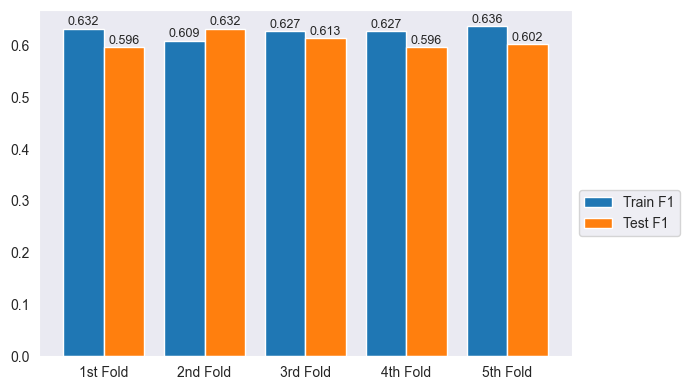

In [24]:
from sklearn.model_selection import StratifiedKFold, cross_validate
stratified_cv = StratifiedKFold(n_splits=5, 
                                shuffle=True, 
                                random_state=0)
cv_results_logreg = cross_validate(LogisticRegression(max_iter=400), 
                                   X, 
                                   y, 
                                   cv=stratified_cv,
                                   scoring=['accuracy', 'precision', 'recall', 'f1'],
                                   return_train_score=True
                                  )
plot_cv_results(cv_results_logreg)

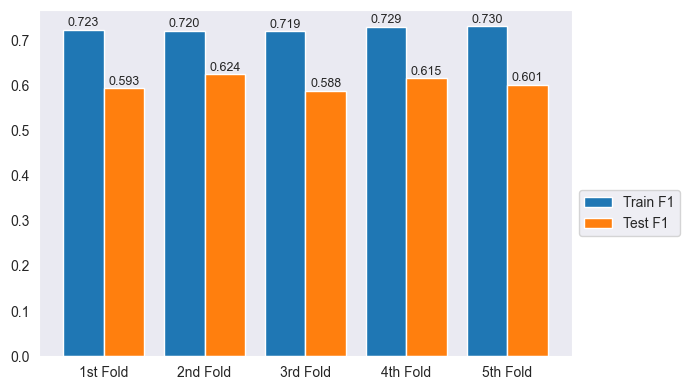

In [25]:
cv_results_knn = cross_validate(KNeighborsClassifier(), 
                                X, 
                                y, 
                                cv=stratified_cv,
                                scoring=['accuracy', 'precision', 'recall', 'f1'],
                                return_train_score=True
                               )
plot_cv_results(cv_results_knn)

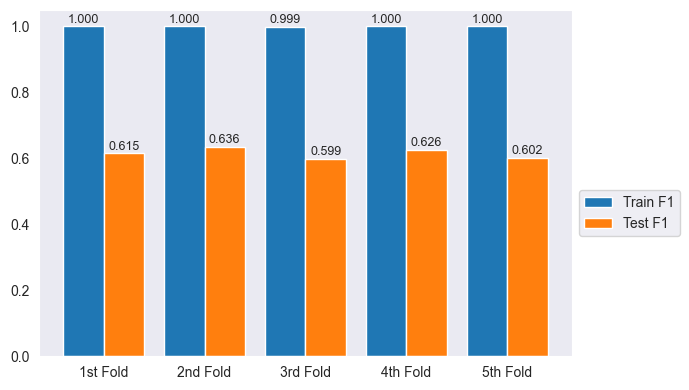

In [26]:
cv_results_rf = cross_validate(RandomForestClassifier(), 
                               X, 
                               y, 
                               cv=stratified_cv,
                               scoring=['accuracy', 'precision', 'recall', 'f1'],
                               return_train_score=True
                              )
plot_cv_results(cv_results_rf)

From our observations, Random Forest classifier has to best potential to perform well on our dataset. But the default settings for  Random Forest is clearly overfitting our small dataset.

In the next step, we'll fine-tune the Random Forest classifier to minimize overfitting and enhance its F1-score on the test set.

### Random Forest hyperparameter tuning
We will fine tune the random forest classifier with the following hyperparameters:
- `max_depth`: determines the longest path from the root node to leaf nodes. "Increasing the `max_depth` can improve the model's performance, but it also increases the risk of overfitting."
- `min_samples_leaf`: specifies the minimum number of samples that should be present in the leaf node after splitting a node.  This hyperparameter also helps prevent overfitting as the parameter value increases.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `n_estimators`: The number of trees in the forest.

In [27]:
grid_params = {"max_depth": [3, 4, 5, 6, 7, 10, 15, 20],
               "min_samples_leaf": [1, 2, 4],
               "min_samples_split": [2, 4, 6, 8, 10],
               "n_estimators": [10, 20, 30, 40, 60, 80, 100, 150, 200, 300]}

We will split our data into a training set and a test set, allocating 80% for training and 20% for testing.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### GridSearchCV
To carry out exhaustive hyperparemeter search, we use GridSearchCV from scikit-learn.
- Estimator will be a Random Forest with `class_weight`set to `balanced` because we have an imbalanced dataset.
- `cv=5` to specifiy using `StratifiedKFold` strategy.
- `scoring=f1`. F1-score will be chose as the scoring criterion because of imbalanced dataset.

In [29]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(class_weight="balanced")
grid_search_rf = GridSearchCV(estimator = rf, 
                              param_grid = grid_params,
                              cv = 5, 
                              n_jobs = -1,
                              verbose=2, 
                              scoring="f1"
                             )

In [30]:
start = time.perf_counter()
grid_search_rf.fit(X_train, y_train)
end = time.perf_counter()
print(f"Training time: {end-start} seconds")

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Training time: 167.4577165999799 seconds


In [31]:
best_grid = grid_search_rf.best_estimator_

In [33]:
best_grid.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Performance on Test set:

In [50]:
y_pred = best_grid.predict(X_test)
print(f"Test Accuracy of Random Forest: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Test F1 score of Random Forest: {f1_score(y_test, y_pred)*100:.2f}")
print(f"Test Classification report:\n{classification_report(y_test, y_pred)}")
print(f"Test Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Test Accuracy of Random Forest: 80.30%
Test F1 score of Random Forest: 66.78
Test Classification report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       751
           1       0.58      0.80      0.67       249

    accuracy                           0.80      1000
   macro avg       0.75      0.80      0.76      1000
weighted avg       0.84      0.80      0.81      1000

Test Confusion Matrix:
[[605 146]
 [ 51 198]]


#### Performance on Train set

In [51]:
y_train_pred = best_grid.predict(X_train)
print(f"Test Accuracy of Random Forest: {accuracy_score(y_train, y_train_pred)*100:.2f}%")
print(f"Test F1 score of Random Forest: {f1_score(y_train, y_train_pred)*100:.2f}")
print(f"Test Classification report:\n{classification_report(y_train, y_train_pred)}")
print(f"Test Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}")

Test Accuracy of Random Forest: 84.47%
Test F1 score of Random Forest: 74.16
Test Classification report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      3028
           1       0.62      0.92      0.74       972

    accuracy                           0.84      4000
   macro avg       0.80      0.87      0.82      4000
weighted avg       0.88      0.84      0.85      4000

Test Confusion Matrix:
[[2488  540]
 [  81  891]]


#### Prediction of 25000 individuals' incomes

In [46]:
prediction = X_pred.copy()
prediction["Income"] = best_grid.predict(X_pred)
prediction["Income"].replace({0:"<=50K", 1:">50K"}, inplace=True)
prediction

,Employment_Federal-gov,Employment_Local-gov,Employment_Never-worked,Employment_Private,Employment_Self-emp-inc,Employment_Self-emp-not-inc,Employment_State-gov,Employment_Without-pay,Education_10th,Education_11th,...,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia,Age,Factor,School_period,Hours,Income
5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.410959,0.045736,0.933333,0.500000,>50K
5001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.520548,0.094531,0.800000,0.377551,<=50K
5002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.123288,0.081754,0.533333,0.397959,>50K
5003,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.150685,0.101458,0.533333,0.397959,<=50K
5004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.260274,0.033999,0.533333,0.397959,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.178082,0.029337,0.866667,0.448980,<=50K
29996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.424658,0.072796,0.666667,0.561224,>50K
29997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.602740,0.105311,0.600000,0.346939,>50K
29998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.328767,0.116878,0.533333,0.397959,<=50K


Text(0.5, 1.0, 'Distribution of Income predictions')

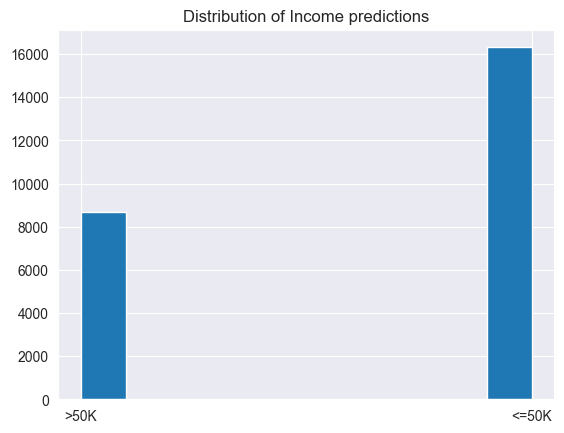

In [52]:
prediction.Income.hist()
plt.title("Distribution of Income predictions")